# 深度学习基础数学知识(pytorch)

## 线性代数

### 标量
标量由只有一个元素的张量表示。 下面的代码将实例化两个标量，并执行一些熟悉的算术运算，即加法、乘法、除法和指数。

In [6]:
import torch
x = torch.tensor(3.0)
y = torch.tensor(2.0)
x+y, x*y,x/y,x**y,x-y

(tensor(5.), tensor(6.), tensor(1.5000), tensor(9.), tensor(1.))

### 向量
向量可以被视为标量值组成的列表。 这些标量值被称为向量的元素（element）或分量（component）。人们通过一维张量表示向量。一般来说，张量可以具有任意长度，取决于机器的内存限制。

In [7]:
x = torch.arange(4)
x

tensor([0, 1, 2, 3])

我们可以使用下标来引用向量的任一元素，例如可以通过$x_i$来引用第$i$个元素。 注意，元素$x_i$是一个标量，所以我们在引用它时不会加粗。 大量文献认为列向量是向量的默认方向，在本书中也是如此。 在数学中，向量$\mathbf{x}$可以写为：
$$\begin{split}\mathbf{x} =\begin{bmatrix}x_{1}  \\x_{2}  \\ \vdots  \\x_{n}\end{bmatrix},\end{split}$$

其中$x_1,\ldots,x_n$是向量的元素。在代码中，我们通过张量的索引来访问任一元素。

In [8]:
x[3]

tensor(3)

### 长度、维度和形状
向量只是一个数字数组，就像每个数组都有一个长度一样，每个向量也是如此。 在数学表示法中，如果我们想说一个向量$\mathbf{x}$由$n$个实值标量组成， 可以将其表示为$\mathbf{x}\in\mathbb{R}^n$。 向量的长度通常称为向量的维度（dimension）。

与普通的Python数组一样，我们可以通过调用Python的内置len()函数来访问张量的长度。

In [9]:
len(x)

4

当用张量表示一个向量（只有一个轴）时，我们也可以通过.shape属性访问向量的长度。 形状（shape）是一个元素组，列出了张量沿每个轴的长度（维数）。 对于只有一个轴的张量，形状只有一个元素。

In [10]:
x.shape

torch.Size([4])

请注意，维度（dimension）这个词在不同上下文时往往会有不同的含义，这经常会使人感到困惑。 为了清楚起见，我们在此明确一下： 向量或轴的维度被用来表示向量或轴的长度，即向量或轴的元素数量。 然而，张量的维度用来表示张量具有的轴数。 在这个意义上，张量的某个轴的维数就是这个轴的长度。

### 矩阵
正如向量将标量从零阶推广到一阶，矩阵将向量从一阶推广到二阶。 矩阵，我们通常用粗体、大写字母来表示 （例如，$\mathbf{X}$、$\mathbf{Y}$和$\mathbf{Z}$）， 在代码中表示为具有两个轴的张量。

$$\begin{split}\mathbf{A}=\begin{bmatrix} a_{11} & a_{12} & \cdots & a_{1n} \\ a_{21} & a_{22} & \cdots & a_{2n} \\ \vdots & \vdots & \ddots & \vdots \\ a_{m1} & a_{m2} & \cdots & a_{mn} \\ \end{bmatrix}.\end{split}$$

当调用函数来实例化张量时， 我们可以通过指定两个分量$m$和$n$来创建一个形状为$m \times n$的矩阵。

In [11]:
A = torch.arange(20).reshape(5,4)
A

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11],
        [12, 13, 14, 15],
        [16, 17, 18, 19]])

In [12]:
# 转置
A.T

tensor([[ 0,  4,  8, 12, 16],
        [ 1,  5,  9, 13, 17],
        [ 2,  6, 10, 14, 18],
        [ 3,  7, 11, 15, 19]])

作为方阵的一种特殊类型，对称矩阵等于其转置：$\mathbf{A} = \mathbf{A}^\top$。这里定义一个对称矩阵$\mathbf{B}$:

In [14]:
B = torch.tensor([[1,2,3],[2,0,4],[3,4,5]])
B

tensor([[1, 2, 3],
        [2, 0, 4],
        [3, 4, 5]])

In [15]:
B == B.T

tensor([[True, True, True],
        [True, True, True],
        [True, True, True]])

### 张量
就像向量是标量的推广，矩阵是向量的推广一样，我们可以构建具有更多轴的数据结构。 张量（本小节中的“张量”指代数对象）是描述具有任意数量轴的$n$维数组的通用方法。 例如，向量是一阶张量，矩阵是二阶张量。 张量用特殊字体的大写字母表示（例如，$\mathsf{X}$、$\mathsf{Y}$和$\mathsf{Z}$）， 它们的索引机制（例如$x_{ijk}$和$[\mathsf{X}]_{1,2i-1,3}$）与矩阵类似。

当我们开始处理图像时，张量将变得更加重要，图像以$n$维数组形式出现， 其中3个轴对应于高度、宽度，以及一个通道（channel）轴， 用于表示颜色通道（红色、绿色和蓝色）。 现在先将高阶张量暂放一边，而是专注学习其基础知识。

In [17]:
X = torch.arange(24).reshape(2,3,4)
X

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],

        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])

### 张量算法的基本性质
标量、向量、矩阵和任意数量轴的张量（本小节中的“张量”指代数对象）有一些实用的属性。 例如，从按元素操作的定义中可以注意到，任何按元素的一元运算都不会改变其操作数的形状。 同样，给定具有相同形状的任意两个张量，任何按元素二元运算的结果都将是相同形状的张量。 例如，将两个相同形状的矩阵相加，会在这两个矩阵上执行元素加法。

In [19]:
A = torch.arange(20,dtype=torch.float32).reshape(5,4)
B = A.clone() # 复制 A 到 B
A,A+B

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  2.,  4.,  6.],
         [ 8., 10., 12., 14.],
         [16., 18., 20., 22.],
         [24., 26., 28., 30.],
         [32., 34., 36., 38.]]))

In [20]:
A * B

tensor([[  0.,   1.,   4.,   9.],
        [ 16.,  25.,  36.,  49.],
        [ 64.,  81., 100., 121.],
        [144., 169., 196., 225.],
        [256., 289., 324., 361.]])

将张量乘以或加上一个标量不会改变张量的形状，其中张量的每个元素都将与标量相加或相乘。

In [23]:
a = 2
X = torch.arange(24).reshape(2,3,4)
X,a + X,a * X,(a * X).shape

(tensor([[[ 0,  1,  2,  3],
          [ 4,  5,  6,  7],
          [ 8,  9, 10, 11]],
 
         [[12, 13, 14, 15],
          [16, 17, 18, 19],
          [20, 21, 22, 23]]]),
 tensor([[[ 2,  3,  4,  5],
          [ 6,  7,  8,  9],
          [10, 11, 12, 13]],
 
         [[14, 15, 16, 17],
          [18, 19, 20, 21],
          [22, 23, 24, 25]]]),
 tensor([[[ 0,  2,  4,  6],
          [ 8, 10, 12, 14],
          [16, 18, 20, 22]],
 
         [[24, 26, 28, 30],
          [32, 34, 36, 38],
          [40, 42, 44, 46]]]),
 torch.Size([2, 3, 4]))

### 降维
我们可以对任意张量进行的一个有用的操作是计算其元素的和。 数学表示法使用$\sum$符号表示求和。 为了表示长度为$d$的向量中元素的总和，可以记为$\sum_{i=1}^dx_i$。 在代码中可以调用计算求和的函数：
我们可以表示任意形状张量的元素和。 例如，矩阵$\mathbf{A}$中元素的和可以记为$\sum_{i=1}^{m} \sum_{j=1}^{n} a_{ij}$。

默认情况下，调用求和函数会沿所有的轴降低张量的维度，使它变为一个标量。 我们还可以指定张量沿哪一个轴来通过求和降低维度。 以矩阵为例，为了通过求和所有行的元素来降维（轴0），可以在调用函数时指定axis=0。 由于输入矩阵沿0轴降维以生成输出向量，因此输入轴0的维数在输出形状中消失。

In [24]:
X = torch.arange(4,dtype=torch.float32)
X, X.sum()

(tensor([0., 1., 2., 3.]), tensor(6.))

In [25]:
A.shape, A.sum()

(torch.Size([5, 4]), tensor(190.))

In [28]:
A_sum_axis0 = A.sum(axis=0)
A_sum_axis0, A_sum_axis0.shape,A

(tensor([40., 45., 50., 55.]),
 torch.Size([4]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]))

In [29]:
A_sum_axis1 = A.sum(axis=1)
A_sum_axis1, A_sum_axis1.shape,A

(tensor([ 6., 22., 38., 54., 70.]),
 torch.Size([5]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]))

沿着行和列对矩阵求和，等价于对矩阵的所有元素进行求和。

In [30]:
A.sum(axis=[0, 1])  # 结果和A.sum()相同

tensor(190.)

In [31]:
A.mean(),A.sum(),A.numel()

(tensor(9.5000), tensor(190.), 20)

In [32]:
A.mean(axis=0), A.sum(axis=0) / A.shape[0]

(tensor([ 8.,  9., 10., 11.]), tensor([ 8.,  9., 10., 11.]))

### 非降维求和
但是，有时在调用函数来计算总和或均值时保持轴数不变会很有用。


In [33]:
sum_A = A.sum(axis=1, keepdims=True)
sum_A

tensor([[ 6.],
        [22.],
        [38.],
        [54.],
        [70.]])

In [35]:
A,A / sum_A

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[0.0000, 0.1667, 0.3333, 0.5000],
         [0.1818, 0.2273, 0.2727, 0.3182],
         [0.2105, 0.2368, 0.2632, 0.2895],
         [0.2222, 0.2407, 0.2593, 0.2778],
         [0.2286, 0.2429, 0.2571, 0.2714]]))

In [36]:
A, A.cumsum(axis=0),A.cumsum(axis=1)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  6.,  8., 10.],
         [12., 15., 18., 21.],
         [24., 28., 32., 36.],
         [40., 45., 50., 55.]]),
 tensor([[ 0.,  1.,  3.,  6.],
         [ 4.,  9., 15., 22.],
         [ 8., 17., 27., 38.],
         [12., 25., 39., 54.],
         [16., 33., 51., 70.]]))

### 点积
点积是两个向量的内积，也称为内积，也叫做标量乘积。
给定两个向量$\mathbf{x},\mathbf{y}\in\mathbb{R}^d$， 它们的点积（dot product）$\mathbf{x}^\top\mathbf{y}$ （或$\langle\mathbf{x},\mathbf{y}\rangle$） 是相同位置的按元素乘积的和：$\mathbf{x}^\top \mathbf{y} = \sum_{i=1}^{d} x_i y_i$。


In [41]:
x = torch.arange(4,dtype=torch.float32)
y = torch.ones(4,dtype=torch.float32)
x,y,torch.dot(x,y)

(tensor([0., 1., 2., 3.]), tensor([1., 1., 1., 1.]), tensor(6.))

In [42]:
torch.sum(x * y)

tensor(6.)

### 矩阵-向量积

$$\begin{split}\mathbf{A}\mathbf{x}
= \begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_m \\
\end{bmatrix}\mathbf{x}
= \begin{bmatrix}
 \mathbf{a}^\top_{1} \mathbf{x}  \\
 \mathbf{a}^\top_{2} \mathbf{x} \\
\vdots\\
 \mathbf{a}^\top_{m} \mathbf{x}\\
\end{bmatrix}.\end{split}$$

在代码中使用张量表示矩阵-向量积，我们使用mv函数。 当我们为矩阵A和向量x调用torch.mv(A, x)时，会执行矩阵-向量积。 注意，A的列维数（沿轴1的长度）必须与x的维数（其长度）相同。

In [43]:
A.shape, x.shape, torch.mv(A, x)

(torch.Size([5, 4]), torch.Size([4]), tensor([ 14.,  38.,  62.,  86., 110.]))

### 矩阵-矩阵乘法
$$\begin{split}\mathbf{A}=\begin{bmatrix}
 a_{11} & a_{12} & \cdots & a_{1k} \\
 a_{21} & a_{22} & \cdots & a_{2k} \\
\vdots & \vdots & \ddots & \vdots \\
 a_{n1} & a_{n2} & \cdots & a_{nk} \\
\end{bmatrix},\quad
\mathbf{B}=\begin{bmatrix}
 b_{11} & b_{12} & \cdots & b_{1m} \\
 b_{21} & b_{22} & \cdots & b_{2m} \\
\vdots & \vdots & \ddots & \vdots \\
 b_{k1} & b_{k2} & \cdots & b_{km} \\
\end{bmatrix}.\end{split}$$

$$\begin{split}\mathbf{A}=
\begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_n \\
\end{bmatrix},
\quad \mathbf{B}=\begin{bmatrix}
 \mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{m} \\
\end{bmatrix}.\end{split}$$

$$\begin{split}\mathbf{C} = \mathbf{AB} = \begin{bmatrix}
\mathbf{a}^\top_{1} \\
\mathbf{a}^\top_{2} \\
\vdots \\
\mathbf{a}^\top_n \\
\end{bmatrix}
\begin{bmatrix}
 \mathbf{b}_{1} & \mathbf{b}_{2} & \cdots & \mathbf{b}_{m} \\
\end{bmatrix}
= \begin{bmatrix}
\mathbf{a}^\top_{1} \mathbf{b}_1 & \mathbf{a}^\top_{1}\mathbf{b}_2& \cdots & \mathbf{a}^\top_{1} \mathbf{b}_m \\
 \mathbf{a}^\top_{2}\mathbf{b}_1 & \mathbf{a}^\top_{2} \mathbf{b}_2 & \cdots & \mathbf{a}^\top_{2} \mathbf{b}_m \\
 \vdots & \vdots & \ddots &\vdots\\
\mathbf{a}^\top_{n} \mathbf{b}_1 & \mathbf{a}^\top_{n}\mathbf{b}_2& \cdots& \mathbf{a}^\top_{n} \mathbf{b}_m
\end{bmatrix}.\end{split}$$

我们可以将矩阵-矩阵乘法$\mathbf{AB}$看作简单地执行$m$次矩阵-向量积，并将结果拼接在一起，形成一个$n \times m$矩阵。 在下面的代码中，我们在A和B上执行矩阵乘法。 这里的A是一个5行4列的矩阵，B是一个4行3列的矩阵。 两者相乘后，我们得到了一个5行3列的矩阵。

In [45]:
B = torch.ones(4, 3)

A,B,torch.mm(A, B)

(tensor([[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.],
         [ 8.,  9., 10., 11.],
         [12., 13., 14., 15.],
         [16., 17., 18., 19.]]),
 tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]),
 tensor([[ 6.,  6.,  6.],
         [22., 22., 22.],
         [38., 38., 38.],
         [54., 54., 54.],
         [70., 70., 70.]]))

### 范数
线性代数中最有用的一些运算符是范数（norm）。 非正式地说，向量的范数是表示一个向量有多大。 这里考虑的大小（size）概念不涉及维度，而是分量的大小。
在线性代数中，向量范数是将向量映射到标量的函数$f$。 给定任意向量$\mathbf{x}$，向量范数要满足一些属性。 

第一个性质是：如果我们按常数因子$\alpha$缩放向量的所有元素， 其范数也会按相同常数因子的绝对值缩放：
$$f(\alpha \mathbf{x}) = |\alpha| f(\mathbf{x}).$$
第二个性质是熟悉的三角不等式：
$$f(\mathbf{x} + \mathbf{y}) \leq f(\mathbf{x}) + f(\mathbf{y}).$$
第三个性质简单地说范数必须是非负的:
$$f(\mathbf{x}) \geq 0.$$
这是有道理的。因为在大多数情况下，任何东西的最小的大小是0。 最后一个性质要求范数最小为0，当且仅当向量全由0组成。
$$\forall i, [\mathbf{x}]_i = 0 \Leftrightarrow f(\mathbf{x})=0.$$
范数听起来很像距离的度量。 欧几里得距离和毕达哥拉斯定理中的非负性概念和三角不等式可能会给出一些启发。 事实上，欧几里得距离是一个$L_2$范数： 假设$n$维向量$\mathbf{x}$中的元素是$x_1,\ldots,x_n$，其$L_2$范数是向量元素平方和的平方根
$$\|\mathbf{x}\|_2 = \sqrt{\sum_{i=1}^n x_i^2},$$
其中，在$L_2$范数中常常省略下标$2$，也就是说$\|\mathbf{x}\|$等同于$\|\mathbf{x}\|_2$。 在代码中，我们可以按如下方式计算向量的$L_2$范数。

In [46]:
u = torch.tensor([3.0, -4.0])
torch.norm(u)

tensor(5.)

深度学习中更经常地使用$L_2$范数的平方，也会经常遇到$L_1$范数，它表示为向量元素的绝对值之和:
$$\|\mathbf{x}\|_1 = \sum_{i=1}^n \left|x_i \right|.$$
与$L_2$范数相比，$L_1$范数受异常值的影响较小。 为了计算$L_1$范数，我们将绝对值函数和按元素求和组合起来。

In [47]:
torch.abs(u).sum()

tensor(7.)

$L_2$范数和$L_1$范数都是更一般的$L_p$范数的特例：
$$\|\mathbf{x}\|_p = \left(\sum_{i=1}^n \left|x_i \right|^p \right)^{1/p}.$$
类似于向量的$L_2$范数，矩阵$\mathbf{X} \in \mathbb{R}^{m \times n}$的Frobenius范数（Frobenius norm）是矩阵元素平方和的平方根：
$$\|\mathbf{X}\|_F = \sqrt{\sum_{i=1}^m \sum_{j=1}^n x_{ij}^2}.$$
Frobenius范数满足向量范数的所有性质，它就像是矩阵形向量的
范数。 调用以下函数将计算矩阵的Frobenius范数。


In [48]:
torch.norm(torch.ones((4,9)))

tensor(6.)

#### 范数和目标
在深度学习中，我们经常试图解决优化问题： 最大化分配给观测数据的概率; 最小化预测和真实观测之间的距离。 用向量表示物品（如单词、产品或新闻文章），以便最小化相似项目之间的距离，最大化不同项目之间的距离。 目标，或许是深度学习算法最重要的组成部分（除了数据），通常被表达为范数。

### 小结
- 标量、向量、矩阵和张量是线性代数中的基本数学对象。

- 向量泛化自标量，矩阵泛化自向量。

- 标量、向量、矩阵和张量分别具有零、一、二和任意数量的轴。

- 一个张量可以通过sum和mean沿指定的轴降低维度。

- 两个矩阵的按元素乘法被称为他们的Hadamard积。它与矩阵乘法不同。

- 在深度学习中，我们经常使用范数，如$L_1$范数、$L_2$范数和Frobenius范数。

- 我们可以对标量、向量、矩阵和张量执行各种操作。

## 微积分
在深度学习中，我们“训练”模型，不断更新它们，使它们在看到越来越多的数据时变得越来越好。 通常情况下，变得更好意味着最小化一个损失函数（loss function）， 即一个衡量“模型有多糟糕”这个问题的分数。 最终，我们真正关心的是生成一个模型，它能够在从未见过的数据上表现良好。 但“训练”模型只能将模型与我们实际能看到的数据相拟合。 因此，我们可以将拟合模型的任务分解为两个关键问题：

- 优化（optimization）：用模型拟合观测数据的过程；

- 泛化（generalization）：数学原理和实践者的智慧，能够指导我们生成出有效性超出用于训练的数据集本身的模型。

### 导数和微分
我们首先讨论导数的计算，这是几乎所有深度学习优化算法的关键步骤。 在深度学习中，我们通常选择对于模型参数可微的损失函数。 简而言之，对于每个参数， 如果我们把这个参数增加或减少一个无穷小的量，可以知道损失会以多快的速度增加或减少，假设我们有一个函数$f: \mathbb{R} \rightarrow \mathbb{R}$，其输入和输出都是标量。如果$f$的导数存在，这个极限被定义为$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}.$$
如果$f'(a)$存在，则称$f$在$a$处是可微（differentiable）的。如果$f$在一个区间内的每个数上都是可微的，则此函数在此区间中是可微的。我们可以将上式的导数$f'(x)$解释为$f(x)$相对于$x$的瞬时变换率。所谓的瞬时变化率是基于$x$中的变化$h$,且$h$接近0。
为了更好的解释导数，我们来考虑一个简单的例子，定义$u=f(x)=3x^2-4x$如下：

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt 
import numpy as np 
from d2l import torch as d2l
from matplotlib_inline import backend_inline

In [2]:
def f(x):
    return 3 * x ** 2 - 4 * x

通过令$x=1$并让$h$接近$0$，$\frac{f(x+h)-f(x)}{h}$的数值结果接近2。 虽然这个实验不是一个数学证明，但稍后会看到，当$x=1$时，导数$u'$是$2$。

In [9]:
def numerical_lim(f,x,h):
    return (f(x+h)-f(x)) / h
h = 0.1

for i in range(7):
    print(f'h={h:.8f},mumerical limit={numerical_lim(f,1,h):.8f}')
    h*=0.1

h=0.10000000,mumerical limit=2.30000000
h=0.01000000,mumerical limit=2.03000000
h=0.00100000,mumerical limit=2.00300000
h=0.00010000,mumerical limit=2.00030000
h=0.00001000,mumerical limit=2.00003000
h=0.00000100,mumerical limit=2.00000300
h=0.00000010,mumerical limit=2.00000030


让我们熟悉一下导数的几个等价符号，给定$y=f(x)$,其中$x$和$y$分别是函数$f$的自变量和应变量。以下表达式是等价的：
$$f'(x) = y' = \frac{dy}{dx} = \frac{df}{dx} = \frac{d}{dx} f(x) = Df(x) = D_x f(x),$$
其中符号$\frac{d}{dx}$和$D$是微分运算符，表示微分操作。我们可以使用一下规则来对常见函数求微分：
 - $DC=0$($C$是一个常数)
 - $Dx^n=nx^{n-1}$(幂律（power rule）$n$是任意实数)
 - $De^x = e^x$
 - $D\ln(x) = 1/x$
 - $D\sin x=cos x$
 - $D\cos x=-sin x$
 - $D\tan x=1+tan^2 x$
 - $D\sec x=sec x \tan x$
 - $D\csc x=-csc x \cot x$
 - $D\cot x=-1+cot^2 x$
 - $D\arctan x= \frac{1}{1+x^2}$
 - $D\sinh x= \cosh x$
 - $D\cosh x= \sinh x$
 - $D\tanh x= \frac{1}{cosh^2 x}$
 - $D\coth x= \frac{1}{coth^2 x}$
 - $D\arcsin x= \frac{1}{1-x^2}$
 - $D\arccos x= -\frac{1}{1-x^2}$
 
 为了微分一个由一些常见函数组成的函数，下面的一些法则方便使用。假设函数$f$和$g$都是可微的，$C$是一个常数，则：
 
 常数相乘法则：
 $$\frac{d}{dx} [Cf(x)] = C \frac{d}{dx} f(x),$$
 加法法则：
 $$\frac{d}{dx} [f(x) + g(x)] = \frac{d}{dx} f(x) + \frac{d}{dx} g(x),$$
 乘法法则：
 $$\frac{d}{dx} [f(x)g(x)] = f(x)\frac{d}{dx} [g(x)] + g(x)\frac{d}{dx}[f(x)],$$
 除法法则：
 $$\frac{d}{dx} \left[\frac{f(x)}{g(x)}\right] = \frac{g(x) \frac{d}{dx} [f(x)] - f(x) \frac{d}{dx} [g(x)]}{[g(x)]^2}.$$
 指数法则：
 $$\frac{d}{dx} [e^x] = e^x \frac{d}{dx} [x] = e^x$$

在上面的等价符号中，我们看到了一些微分的基本规则，这些规则可以帮助我们更容易地计算函数的导数。
现在我们应用上述几个法则来计算$u'=f'(x)=3\frac{d}{dx}x^2-4\frac{d}{dx}x=6x-4$。令$x = 1$,我们有$u'=2$：在这个实验中，数值结果接近2，这一点得到了在前面的实验支持。当$x = 1$时，此导数也是曲线$u=f(x)$切线的斜率。

为了对导数的这种解释进行可视化，我们将使用matplotlib，这是Python中用于绘制图形的库。

In [10]:
def use_svg_display():
    """Use svg format to display plot in jupyter"""
    backend_inline.set_matplotlib_formats('svg')

我们定义set_figsize函数来设置图表大小。注意，这里可以直接使用d2l.plt,因为导入语句from matplotlib import pyplot as plt已标记为保存到d2l中。

In [11]:
def set_figsize(figsize = (3,5,2.5)): # @save
    """Set the figure size for matplotlib."""
    use_svg_display()
    d2l.plt.rcParams['figure.figsize'] = figsize

下面的set_axes函数用于设置由matplotlib生成图表的轴的属性。

In [12]:
#@save
def set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend):
    """Set the axes for matplotlib."""
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.set_xlim(xlim)
    axes.set_ylim(ylim)
    if legend:
        axes.legend(legend)
    axes.grid()    

通过这三个用于图形配置的函数，定义一个plot函数来简洁地绘制多条曲线， 因为我们需要在整个书中可视化许多曲线。

In [13]:
#@save
def plot(X, Y=None, xlabel=None, ylabel=None, legend=None, xlim=None,
         ylim=None, xscale='linear', yscale='linear',
         fmts=('-', 'm--', 'g-.', 'r:'), figsize=(3.5, 2.5), axes=None):
    """绘制数据点"""
    if legend is None:
        legend = []

    set_figsize(figsize)
    axes = axes if axes else d2l.plt.gca()

    # 如果X有一个轴，输出True
    def has_one_axis(X):
        return (hasattr(X, "ndim") and X.ndim == 1 or isinstance(X, list)
                and not hasattr(X[0], "__len__"))

    if has_one_axis(X):
        X = [X]
    if Y is None:
        X, Y = [[]] * len(X), X
    elif has_one_axis(Y):
        Y = [Y]
    if len(X) != len(Y):
        X = X * len(Y)
    axes.cla()
    for x, y, fmt in zip(X, Y, fmts):
        if len(x):
            axes.plot(x, y, fmt)
        else:
            axes.plot(y, fmt)
    set_axes(axes, xlabel, ylabel, xlim, ylim, xscale, yscale, legend)

下来我们可以绘制函数$u=f(x)$及其在$x = 1$处的切线$y=2x-3$,其中系数2是切线的斜率。

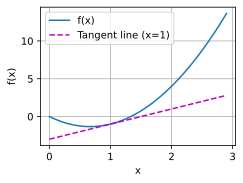

In [16]:
x = np.arange(0,3,0.1)
plot(x,[f(x),2 * x - 3],'x','f(x)',legend=['f(x)','Tangent line (x=1)'])

### 偏导数
到目前为止，我们只讨论了仅含一个变量的函数的微分。在深度学习中，函数通常依赖于许多变量。因此，我们需要将微分的思想推广到多元函数（multivariate function）上。

我们可以使用符号$\frac{\partial f(x_1,x_2)}{\partial x_1}$来表示函数$f(x_1,x_2)$对变量$x_1$的偏导数。

设$y = f(x_1, x_2, \ldots, x_n)$是一个具有$n$个变量的函数，$y$关于第$i$个参数$x_i$的偏导数(partial derivative)为:
$$\frac{\partial y}{\partial x_i} = \lim_{h \rightarrow 0} \frac{f(x_1, \ldots, x_{i-1}, x_i+h, x_{i+1}, \ldots, x_n) - f(x_1, \ldots, x_i, \ldots, x_n)}{h}.$$

为了计算$\frac{\partial y}{\partial x_i}$,我们可以简单地将$x_1, \ldots, x_{i-1}, x_{i+1}, \ldots, x_n$看作常数，并计算$y$关于$x_i$的导数。对于偏导数的表示，以下是等价的：
$$\frac{\partial y}{\partial x_i} = \frac{\partial f}{\partial x_i} = f_{x_i} = f_i = D_i f = D_{x_i} f.$$

举个例子，我们将计算函数$f(x,y) = x^2 + y^2$关于$x$和$y$的偏导数。我们可以将$y$看作常数，并计算$f(x,y)$关于$x$的导数，得到$2x$。我们可以将$x$看作常数，并计算$f(x,y)$关于$y$的导数，得到$2y$。因此，$\frac{\partial f(x,y)}{\partial x} = 2x$，$\frac{\partial f(x,y)}{\partial y} = 2y$



### 梯度
我们可以连接一个多元函数对其所有变量的偏导数，以得到该函数的梯度(gradient)向量。具体而言，设函数$f:\mathbb{R}^n\rightarrow\mathbb{R}$的输入是一个$n$维向量$\mathbf{x}=[x_1,x_2,\ldots,x_n]^\top$，并且输出是一个标量。函数$f(x)$相对于$X$的梯度是第一个包含$n$个偏导数的向量：  
$$
\nabla f(\mathbf{x}) = \begin{bmatrix}
\frac{\partial f}{\partial x_1}(\mathbf{x}) \\
\frac{\partial f}{\partial x_2}(\mathbf{x}) \\
\vdots \\
\frac{\partial f}{\partial x_n}(\mathbf{x})
\end{bmatrix}
$$
其中$\nabla_{\mathbf{x}} f(\mathbf{x})$通常在没有歧义时被写作$\nabla f(\mathbf{x})$。

假设$X$为$n$维向量，在微分多元函数时经常使用一下规则：
- 对于所有$\mathbf{A} \in \mathbb{R}^{m \times n}$,都有$\nabla_{\mathbf{x}} \mathbf{A} \mathbf{x} = \mathbf{A}^\top$
- 对于所有$\mathbf{A} \in \mathbb{R}^{n \times m}$,都有$\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} = \mathbf{A}$
- 对于所有$\mathbf{A} \in \mathbb{R}^{n \times n}$,都有$\nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{A} \mathbf{x} = (\mathbf{A} + \mathbf{A}^\top)\mathbf{x}$
- $\nabla_{\mathbf{x}} \|\mathbf{x} \|^2 = \nabla_{\mathbf{x}} \mathbf{x}^\top \mathbf{x} = 2\mathbf{x}$
同样，对于任何矩阵$\mathbf{X}$,都有$\nabla_{\mathbf{X}} \|\mathbf{X} \|_F^2 = 2\mathbf{X}$。正如我们之后将看到的，梯度对于设计深度学习中的优化算法有很大的用处。

### 链式法则
然而，上面方法可能很难找到梯度。 这是因为在深度学习中，多元函数通常是复合（composite）的， 所以难以应用上述任何规则来微分这些函数。 幸运的是，链式法则可以被用来微分复合函数。

让我们先考虑单变量函数。假设函数$y=f(u)$和$u=g(x)$都是可微的，根据链式法则：
$$\frac{dy}{dx} = \frac{dy}{du} \frac{du}{dx}.$$


现在考虑一个更一般的场景，即函数具有任意数量的变量的情况。 假设可微分函数$y$
有变量$u_1, u_2, \ldots, u_m$，其中每个可微分函数$u_i$都有变量$x_1, x_2, \ldots, x_n$。 注意，$y$是$x_1, x_2, \ldots, x_n$的函数。 对于任意$i = 1, 2, \ldots, n$，链式法则给出：
$$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial u_1} \frac{\partial u_1}{\partial x_i} + \frac{\partial y}{\partial u_2} \frac{\partial u_2}{\partial x_i} + \cdots + \frac{\partial y}{\partial u_m} \frac{\partial u_m}{\partial x_i}$$

### 小结
- 微分和积分是微积分的两个分支，前者可以应用于深度学习中的优化问题。

- 导数可以被解释为函数相对于其变量的瞬时变化率，它也是函数曲线的切线的斜率。

- 梯度是一个向量，其分量是多变量函数相对于其所有变量的偏导数。

- 链式法则可以用来微分复合函数。

## 自动微分
求导是几乎所有深度学习优化算法的关键步骤。 虽然求导的计算很简单，只需要一些基本的微积分。 但对于复杂的模型，手工进行更新是一件很痛苦的事情（而且经常容易出错）。

深度学习框架通过自动计算导数，即自动微分（automatic differentiation）来加快求导。 实际中，根据设计好的模型，系统会构建一个计算图（computational graph）， 来跟踪计算是哪些数据通过哪些操作组合起来产生输出。 自动微分使系统能够随后反向传播梯度。 这里，反向传播（backpropagate）意味着跟踪整个计算图，填充关于每个参数的偏导数。

### 一个简单的例子
作为一个演示例子，假设我们想对函数$y=2\mathbf{x}^{\top}\mathbf{x}$关于列向量$\mathbf{x}$求导。 首先，我们创建变量x并为其分配一个初始值。

In [12]:
import torch
x = torch.arange(4.0)
x

tensor([0., 1., 2., 3.])

在我们计算$y$关于$\mathbf{x}$的梯度之前，需要一个地方来存储梯度。 重要的是，我们不会在每次对一个参数求导时都分配新的内存。 因为我们经常会成千上万次地更新相同的参数，每次都分配新的内存可能很快就会将内存耗尽。 注意，一个标量函数关于向量$\mathbf{x}$的梯度是向量，并且与$\mathbf{x}$具有相同的形状。

In [13]:
x.requires_grad_(True)  # 等价于x=torch.arange(4.0,requires_grad=True)
x.grad  # 默认值是None

现在计算$y$。

In [14]:
y = 2 * torch.dot(x,x)
y

tensor(28., grad_fn=<MulBackward0>)

x是一个长度为4的向量，计算x和x的点积，得到了我们赋值给y的标量输出。 接下来，通过调用反向传播函数来自动计算y关于x每个分量的梯度，并打印这些梯度。

In [15]:
y.backward()
x.grad

tensor([ 0.,  4.,  8., 12.])

函数$y=2\mathbf{x}^{\top}\mathbf{x}$关于$\mathbf{x}$的梯度应为$4\mathbf{x}$。 让我们快速验证这个梯度是否计算正确。

In [16]:
x.grad == 4 * x

tensor([True, True, True, True])

现在计算x的另一个函数

In [17]:
# 在默认情况下，PyTorch会累积梯度，我们需要清除之前的值
x.grad.zero_()
y = x.sum()
y.backward()
x.grad

tensor([1., 1., 1., 1.])

### 非标量变量的反向传播
当y不是标量时，向量y关于向量x的导数的最自然解释是一个矩阵。 对于高阶和高维的y和x，求导的结果可以是一个高阶张量。

然而，虽然这些更奇特的对象确实出现在高级机器学习中（包括深度学习中）， 但当调用向量的反向计算时，我们通常会试图计算一批训练样本中每个组成部分的损失函数的导数。 这里，我们的目的不是计算微分矩阵，而是单独计算批量中每个样本的偏导数之和。

In [18]:
# 对非标量调用backward需要传入一个gradient参数，该参数指定微分函数关于self的梯度。
# 本例只想求偏导数的和，所以传递一个1的梯度是合适的
x.grad.zero_()
y = x * x
# 等价于y.backward(torch.ones(len(x)))
y.sum().backward()
x.grad

tensor([0., 2., 4., 6.])

### 分离计算
有时，我们希望将某些计算移动到记录的计算图之外。 例如，假设y是作为x的函数计算的，而z则是作为y和x的函数计算的。 想象一下，我们想计算z关于x的梯度，但由于某种原因，希望将y视为一个常数， 并且只考虑到x在y被计算后发挥的作用。

这里可以分离y来返回一个新变量u，该变量与y具有相同的值， 但丢弃计算图中如何计算y的任何信息。 换句话说，梯度不会向后流经u到x。 因此，下面的反向传播函数计算z=u*x关于x的偏导数，同时将u作为常数处理， 而不是z=x*x*x关于x的偏导数。

In [19]:
x.grad.zero_()
y = x * x
u = y.detach()
z = u * x

z.sum().backward()
x.grad == u

tensor([True, True, True, True])

由于记录了y的计算结果，我们可以随后在y上调用反向传播， 得到y=x*x关于的x的导数，即2*x。

In [20]:
x.grad.zero_()
y.sum().backward()
x.grad == 2 * x

tensor([True, True, True, True])

###  Python控制流的梯度计算
使用自动微分的一个好处是： 即使构建函数的计算图需要通过Python控制流（例如，条件、循环或任意函数调用），我们仍然可以计算得到的变量的梯度。 在下面的代码中，while循环的迭代次数和if语句的结果都取决于输入a的值。

In [21]:
def f(a):
    b = a * 2
    while b.norm() < 1000:
        b = b * 2
    if b.sum() > 0:
        c = b
    else:
        c = 100 * b
    return c

让我们计算梯度

In [22]:
a = torch.randn(size=(), requires_grad=True)
d = f(a)
d.backward()

我们现在可以分析上面定义的f函数。 请注意，它在其输入a中是分段线性的。 换言之，对于任何a，存在某个常量标量k，使得f(a)=k*a，其中k的值取决于输入a，因此可以用d/a验证梯度是否正确。

In [23]:
a.grad == d / a

tensor(True)

### 小结
深度学习框架可以自动计算导数：我们首先将梯度附加到想要对其计算偏导数的变量上，然后记录目标值的计算，执行它的反向传播函数，并访问得到的梯度。

## 概率
简单地说，机器学习就是做出预测。

根据病人的临床病史，我们可能想预测他们在下一年心脏病发作的概率。 在飞机喷气发动机的异常检测中，我们想要评估一组发动机读数为正常运行情况的概率有多大。 在强化学习中，我们希望智能体（agent）能在一个环境中智能地行动。 这意味着我们需要考虑在每种可行的行为下获得高奖励的概率。 当我们建立推荐系统时，我们也需要考虑概率。 例如，假设我们为一家大型在线书店工作，我们可能希望估计某些用户购买特定图书的概率。 为此，我们需要使用概率学。 有完整的课程、专业、论文、职业、甚至院系，都致力于概率学的工作。 所以很自然地，我们在这部分的目标不是教授整个科目。 相反，我们希望教给读者基础的概率知识，使读者能够开始构建第一个深度学习模型， 以便读者可以开始自己探索它。
### 基本概率论
假设我们掷骰子，想知道看到1的几率有多大，而不是看到另一个数字。 如果骰子是公平的，那么所有六个结果$\{1, \ldots, 6\}$都有相同的可能发生， 因此我们可以说$1$发生的概率为$\frac{1}{6}$。

然而现实生活中，对于我们从工厂收到的真实骰子，我们需要检查它是否有瑕疵。 检查骰子的唯一方法是多次投掷并记录结果。 对于每个骰子，我们将观察到$\{1, \ldots, 6\}$中的一个值。 对于每个值，一种自然的方法是将它出现的次数除以投掷的总次数， 即此事件（event）概率的估计值。 大数定律（law of large numbers）告诉我们： 随着投掷次数的增加，这个估计值会越来越接近真实的潜在概率。 让我们用代码试一试！


In [1]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

在统计学中，我们把从概率分布中抽取样本的过程称为抽样（sampling）。 笼统来说，可以把分布（distribution）看作对事件的概率分配， 稍后我们将给出的更正式定义。 将概率分配给一些离散选择的分布称为多项分布（multinomial distribution）。

为了抽取一个样本，即掷骰子，我们只需传入一个概率向量。 输出是另一个相同长度的向量：它在索引$i$处的值是采样结果中$i$出现的次数。

In [2]:
fair_probs = torch.ones([6]) / 6
multinomial.Multinomial(1, fair_probs).sample()

tensor([0., 0., 1., 0., 0., 0.])

在估计一个骰子的公平性时，我们希望从同一分布中生成多个样本。 如果用Python的for循环来完成这个任务，速度会慢得惊人。 因此我们使用深度学习框架的函数同时抽取多个样本，得到我们想要的任意形状的独立样本数组。

In [3]:
multinomial.Multinomial(10, fair_probs).sample()

tensor([3., 1., 5., 1., 0., 0.])

现在我们知道如何对骰子进行采样，我们可以模拟1000次投掷。 然后，我们可以统计1000次投掷后，每个数字被投中了多少次。 具体来说，我们计算相对频率，以作为真实概率的估计。

In [4]:
# 将结果存储为32位浮点数以进行除法
counts = multinomial.Multinomial(1000, fair_probs).sample()
counts / 1000  # 相对频率作为估计值

tensor([0.1740, 0.1700, 0.1700, 0.1590, 0.1570, 0.1700])

因为我们是从一个公平的骰子中生成的数据，我们知道每个结果都有真实的概率$\frac{1}{6}$， 大约是$0.167$，所以上面输出的估计值看起来不错。

我们也可以看到这些概率如何随着时间的推移收敛到真实概率。 让我们进行500组实验，每组抽取10个样本。

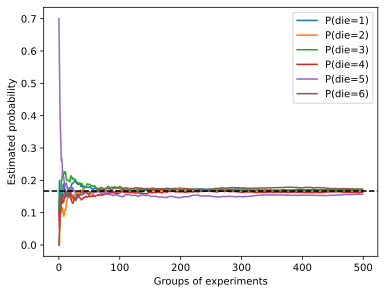

In [7]:
counts = multinomial.Multinomial(10, fair_probs).sample((500,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1, keepdims=True)

d2l.set_figsize((6, 4.5))
for i in range(6):
    d2l.plt.plot(estimates[:, i].numpy(),
                 label=("P(die=" + str(i + 1) + ")"))
d2l.plt.axhline(y=0.167, color='black', linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()
d2l.plt.show()

每条实线对应于骰子的6个值中的一个，并给出骰子在每组实验后出现值的估计概率。 当我们通过更多的实验获得更多的数据时，这$6$条实体曲线向真实概率收敛。

### 概率论公理
在处理骰子掷出时，我们将集合$\mathcal{S} = \{1, 2, 3, 4, 5, 6\}$称为样本空间（sample space）或结果空间（outcome space）， 其中每个元素都是结果（outcome）。 事件（event）是一组给定样本空间的随机结果。 例如，“看到$5$
”（$\{5\}$）和“看到奇数”（$\{1, 3, 5\}$）都是掷出骰子的有效事件。 注意，如果一个随机实验的结果在$\mathcal{A}$中，则事件$\mathcal{A}$已经发生。 也就是说，如果投掷出$3$点，因为$3 \in \{1, 3, 5\}$，我们可以说，“看到奇数”的事件发生了。

概率（probability）可以被认为是将集合映射到真实值的函数。 在给定的样本空间$\mathcal{S}$中，事件$\mathcal{A}$的概率， 表示为$P(\mathcal{A})$，满足以下属性：

- 对于任意事件$\mathcal{A}$，其概率从不会是负数，即$P(\mathcal{A}) \geq 0$；

- 整个样本空间的概率为$1$，即$P(\mathcal{S}) = 1$；

- 对于互斥（mutually exclusive）事件（对于所有$i \neq j$都有$\mathcal{A}_i \cap \mathcal{A}_j = \emptyset$）的任意一个可数序列$\mathcal{A}_1, \mathcal{A}_2, \ldots$，序列中任意一个事件发生的概率等于它们各自发生的概率之和，即$P(\bigcup_{i=1}^{\infty} \mathcal{A}_i) = \sum_{i=1}^{\infty} P(\mathcal{A}_i)$。

以上也是概率论的公理，由科尔莫戈罗夫于1933年提出。 有了这个公理系统，我们可以避免任何关于随机性的哲学争论； 相反，我们可以用数学语言严格地推理。 例如，假设事件$\mathcal{A}_1$为整个样本空间， 且当所有$i > 1$时的$\mathcal{A}_i = \emptyset$， 那么我们可以证明$$，即不可能发生事件的概率是$P(\emptyset) = 0$。

### 随机变量
在我们掷骰子的随机实验中，我们引入了随机变量（random variable）的概念。 随机变量几乎可以是任何数量，并且它可以在随机实验的一组可能性中取一个值。 考虑一个随机变量$X$，其值在掷骰子的样本空间$\mathcal{S}=\{1,2,3,4,5,6\}$中。 我们可以将事件“看到一个$5$”表示为$\{X=5\}$或$X=5$， 其概率表示为$P(\{X=5\})$或$P(X=5)$。 通过$P(X=a)$，我们区分了随机变量$X$和$X$可以采取的值（例如$a$）。 然而，这可能会导致繁琐的表示。 为了简化符号，一方面，我们可以将$P(X)$表示为随机变量$X$上的分布（distribution）： 分布告诉我们$x$获得某一值的概率。 另一方面，我们可以简单用$P(a)$表示随机变量取值$a$的概率。 由于概率论中的事件是来自样本空间的一组结果，因此我们可以为随机变量指定值的可取范围。 例如，$P(1 \leq X \leq 3)$表示事件$\{1 \leq X \leq 3\}$， 即$\{X = 1, 2, \text{or}, 3\}$的概率。 等价地，$P(1 \leq X \leq 3)$表示随机变量$X$从$\{1, 2, 3\}$中取值的概率。

请注意，离散（discrete）随机变量（如骰子的每一面） 和连续（continuous）随机变量（如人的体重和身高）之间存在微妙的区别。 现实生活中，测量两个人是否具有完全相同的身高没有太大意义。 如果我们进行足够精确的测量，最终会发现这个星球上没有两个人具有完全相同的身高。 在这种情况下，询问某人的身高是否落入给定的区间，比如是否在1.79米和1.81米之间更有意义。 在这些情况下，我们将这个看到某个数值的可能性量化为密度（density）。 高度恰好为1.80米的概率为0，但密度不是0。 在任何两个不同高度之间的区间，我们都有非零的概率

###  处理多个随机变量
很多时候，我们会考虑多个随机变量。 比如，我们可能需要对疾病和症状之间的关系进行建模。 给定一个疾病和一个症状，比如“流感”和“咳嗽”，以某个概率存在或不存在于某个患者身上。 我们需要估计这些概率以及概率之间的关系，以便我们可以运用我们的推断来实现更好的医疗服务。

再举一个更复杂的例子：图像包含数百万像素，因此有数百万个随机变量。 在许多情况下，图像会附带一个标签（label），标识图像中的对象。 我们也可以将标签视为一个随机变量。 我们甚至可以将所有元数据视为随机变量，例如位置、时间、光圈、焦距、ISO、对焦距离和相机类型。 所有这些都是联合发生的随机变量。 当我们处理多个随机变量时，会有若干个变量是我们感兴趣的。

### 联合概率
第一个被称为联合概率（joint probability）$P(A=a,B=b)$。 给定任意值$a$和$b$，联合概率可以回答：$A=a$和$B=b$同时满足的概率是多少？ 请注意，对于任何$a$和$b$的取值，$P(A = a, B=b) \leq P(A=a)$。 这点是确定的，因为要同时发生$A=a$和$B=b$，$A=a$就必须发生，$B=b$也必须发生（反之亦然）。因此，$A=a$和$B=b$同时发生的可能性不大于$A=a$或是$B=b$单独发生的可能性。

### 条件概率
联合概率的不等式带给我们一个有趣的比率： $0 \leq \frac{P(A=a, B=b)}{P(A=a)} \leq 1$。 我们称这个比率为条件概率（conditional probability）， 并用$P(B=b \mid A=a)$表示它：它是$B=b$的概率，前提是$A=a$已发生。

### 贝叶斯定理
使用条件概率的定义，我们可以得出统计学中最有用的方程之一： Bayes定理（Bayes’ theorem）。 根据乘法法则（multiplication rule ）可得到$P(A, B) = P(B \mid A) P(A)$。 根据对称性，可得到$P(A, B) = P(A \mid B) P(B)$。 假设$P(B)>0$，求解其中一个条件变量，我们得到
$$P(A \mid B) = \frac{P(B \mid A) P(A)}{P(B)}.$$

请注意，这里我们使用紧凑的表示法： 其中$P(A, B)$是一个联合分布（joint distribution）， $P(A \mid B)$是一个条件分布（conditional distribution）。 这种分布可以在给定值$A = a, B=b$上进行求值。

### 边际化
为了能进行事件概率求和，我们需要求和法则（sum rule）， 即$B$的概率相当于计算$A$的所有可能选择，并将所有选择的联合概率聚合在一起：
$$P(B) = \sum_{A} P(A, B),$$

这也称为边际化（marginalization）。 边际化结果的概率或分布称为边际概率（marginal probability） 或边际分布（marginal distribution）。

### 独立性
另一个有用属性是依赖（dependence）与独立（independence）。 如果两个随机变量$A$和$B$是独立的，意味着事件$A$的发生跟$B$事件的发生无关。 在这种情况下，统计学家通常将这一点表述为$A \perp B$。 根据贝叶斯定理，马上就能同样得到$P(A \mid B) = P(A)$。 在所有其他情况下，我们称$A$和$B$依赖。 比如，两次连续抛出一个骰子的事件是相互独立的。 相比之下，灯开关的位置和房间的亮度并不是（因为可能存在灯泡坏掉、电源故障，或者开关故障）。

由于$P(A \mid B) = \frac{P(A, B)}{P(B)} = P(A)$等价于$P(A, B) = P(A)P(B)$， 因此两个随机变量是独立的，当且仅当两个随机变量的联合分布是其各自分布的乘积。 同样地，给定另一个随机变量$c$时，两个随机变量$A$和$B$是条件独立的（conditionally independent）， 当且仅当$P(A, B \mid C) = P(A \mid C)P(B \mid C)$。 这个情况表示为$A \perp B \mid C$。

### 应用
 假设一个医生对患者进行艾滋病病毒（HIV）测试。 这个测试是相当准确的，如果患者健康但测试显示他患病，这个概率只有1%； 如果患者真正感染HIV，它永远不会检测不出。 我们使用$D_1$
来表示诊断结果（如果阳性，则为$1$
，如果阴性，则为$0$
）， $H$
来表示感染艾滋病病毒的状态（如果阳性，则为$1$
，如果阴性，则为$0$
）。
| 条件概率 | \( H = 1 \) | \( H = 0 \) |
|---------|:----------:|:----------:|
| \( P(D_1 = 1 \| H) \) | 1         | 0.01      |
| \( P(D_1 = 0 \| H) \) | 0         | 0.99      |

每列的加和都是1（但每行的加和不是），因为条件概率需要总和为1，就像概率一样。 让我们计算如果测试出来呈阳性，患者感染HIV的概率，即$P(H = 1 \mid D_1 = 1)$。 显然，这将取决于疾病有多常见，因为它会影响错误警报的数量。 假设人口总体是相当健康的，例如，$P(H=1) = 0.0015$。 为了应用贝叶斯定理，我们需要运用边际化和乘法法则来确定。
$$\begin{split}\begin{aligned}
&P(D_1 = 1) \\
=& P(D_1=1, H=0) + P(D_1=1, H=1)  \\
=& P(D_1=1 \mid H=0) P(H=0) + P(D_1=1 \mid H=1) P(H=1) \\
=& 0.011485.
\end{aligned}\end{split}$$

因此，我们得到

$$\begin{split}\begin{aligned}
&P(H = 1 \mid D_1 = 1)\\ =& \frac{P(D_1=1 \mid H=1) P(H=1)}{P(D_1=1)} \\ =& 0.1306 \end{aligned}.\end{split}$$

换句话说，尽管使用了非常准确的测试，患者实际上患有艾滋病的几率只有13.06%。 正如我们所看到的，概率可能是违反直觉的。


### 期望和方差
为了概括概率分布的关键特征，我们需要一些测量方法。 一个随机变量$X$的期望（expectation，或平均值（average））表示为:
$$E[X] = \sum_{x} x P(X = x).$$
当函数$f(x)$的输入是从分布$P$中抽取的随机变量时，$f(x)$的期望值为:
$$E_{x \sim P}[f(x)] = \sum_x f(x) P(x).$$

在许多情况下，我们希望衡量随机变量$X$与其期望值的偏置。这可以通过方差来量化
$$\mathrm{Var}[X] = E\left[(X - E[X])^2\right] =
E[X^2] - E[X]^2.$$
方差的平方根被称为标准差（standard deviation）。 随机变量函数的方差衡量的是：当从该随机变量分布中采样不同值$x$时， 函数值偏离该函数的期望的程度：
$$\mathrm{Var}[f(x)] = E\left[\left(f(x) - E[f(x)]\right)^2\right].$$


### 小结

- 我们可以从概率分布中采样。

- 我们可以使用联合分布、条件分布、Bayes定理、边缘化和独立性假设来分析多个随机变量。

- 期望和方差为概率分布的关键特征的概括提供了实用的度量形式。

# 线性神经网络

## 线性回归
回归（regression）是能为一个或多个自变量与因变量之间关系建模的一类方法。 在自然科学和社会科学领域，回归经常用来表示输入和输出之间的关系。

在机器学习领域中的大多数任务通常都与预测（prediction）有关。 当我们想预测一个数值时，就会涉及到回归问题。 常见的例子包括：预测价格（房屋、股票等）、预测住院时间（针对住院病人等）、 预测需求（零售销量等）。 但不是所有的预测都是回归问题。 在后面的章节中，我们将介绍分类问题。分类问题的目标是预测数据属于一组类别中的哪一个。
### 线性回归的基本元素
线性回归（linear regression）可以追溯到19世纪初， 它在回归的各种标准工具中最简单而且最流行。 线性回归基于几个简单的假设： 首先，假设自变量$x$和因变量$y$之间的关系是线性的， 即$y$可以表示为$x$中元素的加权和，这里通常允许包含观测值的一些噪声； 其次，我们假设任何噪声都比较正常，如噪声遵循正态分布。

为了解释线性回归，我们举一个实际的例子： 我们希望根据房屋的面积（平方英尺）和房龄（年）来估算房屋价格（美元）。 为了开发一个能预测房价的模型，我们需要收集一个真实的数据集。 这个数据集包括了房屋的销售价格、面积和房龄。 在机器学习的术语中，该数据集称为训练数据集（training data set） 或训练集（training set）。 每行数据（比如一次房屋交易相对应的数据）称为样本（sample）， 也可以称为数据点（data point）或数据样本（data instance）。 我们把试图预测的目标（比如预测房屋价格）称为标签（label）或目标（target）。 预测所依据的自变量（面积和房龄）称为特征（feature）或协变量（covariate）。

通常，我们使用$n$来表示数据集中的样本数。 对索引为$i$的样本，其输入表示为$\mathbf{x}^{(i)} = [x_1^{(i)}, x_2^{(i)}]^\top$， 其对应的标签是$y^{(i)}$。

### 线性模型
线性假设是指目标（房屋价格）可以表示为特征（面积和房龄）的加权和，如下面的式子：
$$\mathrm{price} = w_{\mathrm{area}} \cdot \mathrm{area} + w_{\mathrm{age}} \cdot \mathrm{age} + b.$$

上述中的$w_{area}$和$w_{age}$称为权重（weight），权重决定了每个特征对我们预测值的影响。 我们把$b$称为偏置（bias）、偏移量（offset）或截距（intercept）。 偏置是指当所有特征都取值为0时，预测值应该为多少。 即使现实中不会有任何房子的面积是0或房龄正好是0年，我们仍然需要偏置项。 如果没有偏置项，我们模型的表达能力将受到限制。 严格来说， 上述式子是输入特征的一个 仿射变换（affine transformation）。 仿射变换的特点是通过加权和对特征进行线性变换（linear transformation）， 并通过偏置项来进行平移（translation）。

给定一个数据集，我们的目标是寻找模型的权重$\mathbf{w}$和偏置$b$
， 使得根据模型做出的预测大体符合数据里的真实价格。 输出的预测值由输入特征通过线性模型的仿射变换决定，仿射变换由所选权重和偏置确定。

而在机器学习领域，我们通常使用的是高维数据集，建模时采用线性代数表示法会比较方便。 当我们的输入包含$d$个特征时，我们将预测结果$\hat{y}$（通常使用“尖角”符号表示$y$的估计值）表示为：

$$\hat{y} = w_1  x_1 + ... + w_d  x_d + b.$$


将所有特征放到向量$\mathbf{x} \in \mathbb{R}^d$中， 并将所有权重放到向量$\mathbf{w} \in \mathbb{R}^{n \times d}$中， 我们可以用点积形式来简洁地表达模型：
$$\hat{y} = \mathbf{w}^\top \mathbf{x} + b.$$

向量$\mathbf{x}$对应于单个数据样本的特征。 用符号表示的矩阵$\mathbf{X} \in \mathbb{R}^{n \times d}$可以很方便地引用我们整个数据集的$n$个样本。 其中，$\mathbf{X}$的每一行是一个样本，每一列是一种特征。

对于特征集合$\mathbf{X}$，预测值$\hat{y} \in \mathbb{R}^n$可以通过矩阵-向量乘法表示为：
$$\hat{y} = \mathbf{X} \mathbf{w} + b.$$
这个过程中的求和将使用广播机制，给定训练数据特征$\mathbf{X}$和对应的已知标签$y$,线性回归的目标是找到一组权重向量$\mathbf{w}$和偏置$b$:当给定从$X$的同分布中取样的新样本特征时，这组权重向量和偏置能够使得新样本预测标签的误差尽可能小。

虽然我们相信给定$\mathbf{x}$预测的$y$的最佳模型会是线性的，但我们很难找到一个有$n$个样本的真实数据集，其中对于所有的$1 \leq i \leq n$,$y^{(i)}$完全等于$\mathbf{w}^\top \mathbf{x}^{(i)}+b$。无论我们使用什么手段来观察特征$\mathbf{x}$和标签$y$， 都可能会出现少量的观测误差。 因此，即使确信特征与标签的潜在关系是线性的， 我们也会加入一个噪声项来考虑观测误差带来的影响。

在开始寻找最好的模型参数（model parameters）$\mathbf{w}$和$b$之前， 我们还需要两个东西： （1）一种模型质量的度量方式； （2）一种能够更新模型以提高模型预测质量的方法。

### 损失函数
在我们开始考虑如何用模型拟合（fit）数据之前，我们需要确定一个拟合程度的度量。 损失函数（loss function）能够量化目标的实际值与预测值之间的差距。 通常我们会选择非负数作为损失，且数值越小表示损失越小，完美预测时的损失为0。 回归问题中最常用的损失函数是平方误差函数。 当样本$i$
的预测值为$\hat{y}^{(i)}$，其相应的真实标签为$y^{(i)}$时， 平方误差可以定义为以下公式：
$$l^{(i)}(\mathbf{w}, b) = \frac{1}{2} \left(\hat{y}^{(i)} - y^{(i)}\right)^2.$$
常数$\frac{1}{2}$ 不会带来本质的差别，但这样在形式上稍微简单一些 （因为当我们对损失函数求导后常数系数为1）。 由于训练数据集并不受我们控制，所以经验误差只是关于模型参数的函数。

由于平方误差函数中的二次方项， 估计值$\hat{y}^{(i)}$和观测值$y^{(i)}$之间较大的差异将导致更大的损失。 为了度量模型在整个数据集上的质量，我们需计算在训练集$n$个样本上的损失均值（也等价于求和）。
$$L(\mathbf{w}, b) =\frac{1}{n}\sum_{i=1}^n l^{(i)}(\mathbf{w}, b) =\frac{1}{n} \sum_{i=1}^n \frac{1}{2}\left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right)^2.$$

在训练模型时，我们希望寻找一组参数（$\mathbf{w}^*, b^*$）， 这组参数能最小化在所有训练样本上的总损失。如下式：
$$\mathbf{w}^*, b^* = \operatorname*{argmin}_{\mathbf{w}, b}\  L(\mathbf{w}, b).$$

### 解析解
线性回归刚好是一个很简单的优化问题。与我们将在本书中所讲到的其它大部分模型不同，线性回归的解可以用一个公式简单地表达出来，这类解叫作解析解(analytical solution)。首先，我们将偏置$b$合并到参数$\mathbf{w}$中，合并方法是在包含所有参数的矩阵中附加一列。我们的预测问题是最小化$\|\mathbf{y} - \mathbf{X}\mathbf{w}\|^2$。这在损失平面上只有一个临界点，这个临界点对应于整个区域的损失极小点。将损失关于$\mathbf{w}$的导数设为0，得到解析解：
$$\mathbf{w} = \left(\mathbf{X}^\top \mathbf{X}\right)^{-1} \mathbf{X}^\top \mathbf{y}.$$
像线性回归这样的简单问题存在解析解，但并不是所有的问题都存在解析解。 解析解可以进行很好的数学分析，但解析解对问题的限制很严格，导致它无法广泛应用在深度学习里。

### 随机梯度下降
即使在我们无法得到解析解的情况下，我们仍然可以有效地训练模型。在许多任务上，那些难以优化的模型效果要更好。因此，弄清楚如何训练这些难以优化的模型是非常重要的。

有一种训练模型的方法，这种方法叫做随机梯度下降（stochastic gradient descent）。随机梯度下降的核心思想是，在每次迭代中，我们随机抽取一个样本，并使用该样本来更新模型参数。这种方法几乎可以优化所有深度学习模型，他通过不断地在损失函数递减的方向上更新参数来降低误差。

梯度下降最简单的用法是计算损失函数（数据集中所有样本的损失均值）关于模型参数的导数（在这里也可以称为梯度）。但实际中的执行可能会非常慢：因为在每一次更新参数之前，我们必须遍历整个数据集。因此，我们通常会在每次需要计算更新的时候随机抽取一小批样本，这种变体叫做小批量随机梯度下降(minibatch stochastic gradient descent)。

在每次迭代中，我们首先随机抽样一个小批量$\mathcal{B}$，它是由固定数量的训练样本组成的。然后，我们计算小批量的平均损失关于模型参数的导数（也可以称为梯度）。最后，我们将梯度乘以一个预先确定的正数$\eta$，并从当前参数减去这个梯度，从而更新参数。这个更新规则被称为小批量随机梯度下降（SGD）。

我们用下面的数学公式来表示这一更新过程：
$$(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b).$$

总结一下，算法的步骤如下： （1）初始化模型参数的值，如随机初始化； （2）从数据集中随机抽取小批量样本且在负梯度的方向上更新参数，并不断迭代这一步骤。 对于平方损失和仿射变换，我们可以明确地写成如下形式:
$$\begin{split}\begin{aligned} \mathbf{w} &\leftarrow \mathbf{w} -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b) = \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right),\\ b &\leftarrow b -  \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_b l^{(i)}(\mathbf{w}, b)  = b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right). \end{aligned}\end{split}$$

公式中的$\mathbf{w}$和$\mathbf{x}$都是向量。在这里，更优雅的向量表示法比系数表示法（如$w_1, w_2, \ldots, w_d$）更具可读性。 $|\mathcal{B}|$表示每个小批量中的样本数，这也称为批量大小（batch size）。 $\eta$表示学习率（learning rate）。 批量大小和学习率的值通常是手动预先指定，而不是通过模型训练得到的。 这些可以调整但不在训练过程中更新的参数称为超参数（hyperparameter）。 调参（hyperparameter tuning）是选择超参数的过程。 超参数通常是我们根据训练迭代结果来调整的， 而训练迭代结果是在独立的验证数据集（validation dataset）上评估得到的。

在训练了预先确定的若干迭代次数后（或者直到满足某些其他停止条件后）， 我们记录下模型参数的估计值，表示为$\hat{w},\hat{b}$。 但是，即使我们的函数确实是线性的且无噪声，这些估计值也不会使损失函数真正地达到最小值。 因为算法会使得损失向最小值缓慢收敛，但却不能在有限的步数内非常精确地达到最小值。

线性回归恰好是一个在整个域中只有一个最小值的学习问题。 但是对像深度神经网络这样复杂的模型来说，损失平面上通常包含多个最小值。 深度学习实践者很少会去花费大力气寻找这样一组参数，使得在训练集上的损失达到最小。 事实上，更难做到的是找到一组参数，这组参数能够在我们从未见过的数据上实现较低的损失， 这一挑战被称为泛化（generalization）。

### 矢量化加速
在训练我们的模型时，我们经常希望能够同时处理整个小批量的样本。 为了实现这一点，需要我们对计算进行矢量化， 从而利用线性代数库，而不是在Python中编写开销高昂的for循环。

In [1]:
%matplotlib inline
import math
import time
import numpy as np 
import torch
from d2l import torch as d2l

为了说明矢量化为什么如此重要，我们考虑对向量相加的两种方法。 我们实例化两个全为1的10000维向量。 在一种方法中，我们将使用Python的for循环遍历向量； 在另一种方法中，我们将依赖对+的调用。

In [2]:
n = 10000
a = torch.ones([n])
b = torch.ones([n])

In [4]:
# 计时器
class Timer:  #@save
    """记录多次运行时间"""
    def __init__(self):
        self.times = []
        self.start()

    def start(self):
        """启动计时器"""
        self.tik = time.time()

    def stop(self):
        """停止计时器并将时间记录在列表中"""
        self.times.append(time.time() - self.tik)
        return self.times[-1]

    def avg(self):
        """返回平均时间"""
        return sum(self.times) / len(self.times)

    def sum(self):
        """返回时间总和"""
        return sum(self.times)

    def cumsum(self):
        """返回累计时间"""
        return np.array(self.times).cumsum().tolist()

In [15]:
# 第一种计算方法
c = torch.zeros(n)
timer = Timer()
for i in range(n):
    c[i] = a[i] + b[i]
f'{timer.stop():.5f} sec'

'0.03465 sec'

In [23]:
# 第二种计算方法
timer.start()
d = a + b
f'{timer.stop():.5f} sec'

'0.00012 sec'

结果很明显，第二种方法比第一种方法快得多。 矢量化代码通常会带来数量级的加速。 另外，我们将更多的数学运算放到库中，而无须自己编写那么多的计算，从而减少了出错的可能性

### 正态分布于平均损失

正态分布和线性回归之间的关系很密切。 正态分布（normal distribution），也称为高斯分布（Gaussian distribution）， 最早由德国数学家高斯（Gauss）应用于天文学研究。 简单的说，若随机变量$x$具有均值$\mu$和方差$\sigma^2$（标准差$\sigma$），其正态分布概率密度函数如下：

$$p(x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (x - \mu)^2\right).$$


In [24]:
def normal(x,mu,sigma):
    p = 1/ math.sqrt(2 * math.pi * sigma**2)
    return p * np.exp(-0.5 / sigma**2 * (x - mu)**2)

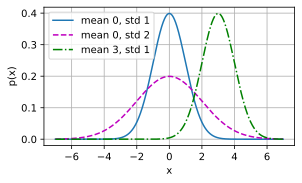

In [26]:
# 使用numpy进行可视化
x = np.arange(-7, 7, 0.01)

# 均值和标准差对
params = [(0, 1), (0, 2), (3, 1)]
d2l.plot(x, [normal(x, mu, sigma) for mu, sigma in params], xlabel='x',
         ylabel='p(x)', figsize=(4.5, 2.5),
         legend=[f'mean {mu}, std {sigma}' for mu, sigma in params])
d2l.plt.show()

就像我们所看到的，改变均值会产生沿$x$轴的偏移，增加方差将会分散分布、降低其峰值。

均方误差损失函数（简称均方损失）可以用于线性回归的一个原因是： 我们假设了观测中包含噪声，其中噪声服从正态分布。 噪声正态分布如下式(其中，$\epsilon \sim \mathcal{N}(0, \sigma^2)$):

$$y = \mathbf{w}^\top \mathbf{x} + b + \epsilon,$$

因此，我们现在可以写出通过给定的$\mathbf{X}$观测到特定$y$的似然(likelihood)
$$P(y \mid \mathbf{x}) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left(-\frac{1}{2 \sigma^2} (y - \mathbf{w}^\top \mathbf{x} - b)^2\right).$$
现在，根据极大似然估计法，参数$\mathbf{w}$和$b$的最优值是使整个数据集的似然最大的值：
$$P(\mathbf y \mid \mathbf X) = \prod_{i=1}^{n} p(y^{(i)}|\mathbf{x}^{(i)}).$$
根据极大似然估计法选择的估计量称为极大似然估计量。虽然使许多指数函数的乘积最大化看起来很困难，但是我们可以在不改变目标的前提下，通过最大似然对数来简化。最小化负对数似然$-\log P(\mathbf y \mid \mathbf X)$。由此可以得到的数学公式是：
$$-\log P(\mathbf y \mid \mathbf X) = \sum_{i=1}^n \frac{1}{2} \log(2 \pi \sigma^2) + \frac{1}{2 \sigma^2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2.$$

现在我们只需要假设$\sigma$是某个固定常数就可以忽略第一项， 因为第一项不依赖于$\mathbf{w}$和$b$。现在第二项除了常数$\frac{1}{\sigma^2}$外，其余部分和前面介绍的均方误差是一样的。 幸运的是，上面式子的解并不依赖于$\sigma$。 因此，在高斯噪声的假设下，最小化均方误差等价于对线性模型的极大似然估计。

### 小结
- 机器学习模型中的关键要素是训练数据、损失函数、优化算法，还有模型本身。
- 矢量化使数学表达上更简洁，同事运行的更快。
- 最小化目标函数和执行极大似然估计等价。
- 线性回归模型也是一个简单的神经网络。